Naive Bayes Accuracy on training data: 0.59
KNN Accuracy on training data: 0.82


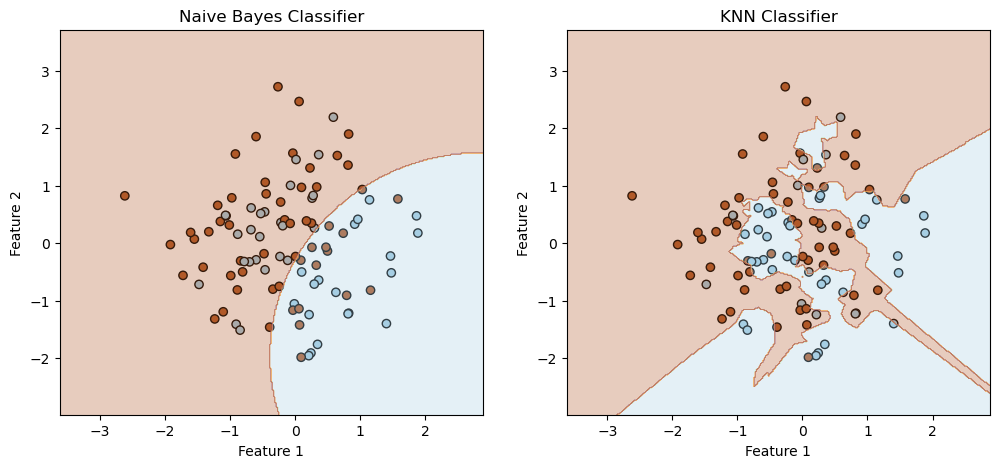

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def fit_naive_bayes(x_train, y_train):
    # Separate the data into classes
    class_0 = x_train[y_train == 0]
    class_1 = x_train[y_train == 1]

    # Calculate prior probabilities
    prior_prob_0 = len(class_0) / len(x_train)
    prior_prob_1 = len(class_1) / len(x_train)

    # Calculate mean and variance for each class and feature
    mean_0 = np.mean(class_0, axis=0)
    mean_1 = np.mean(class_1, axis=0)
    var_0 = np.var(class_0, axis=0)
    var_1 = np.var(class_1, axis=0)

    return prior_prob_0, prior_prob_1, mean_0, mean_1, var_0, var_1

def predict_naive_bayes(x, prior_prob_0, prior_prob_1, mean_0, mean_1, var_0, var_1):
    # Calculate likelihoods for each class
    likelihood_0 = np.exp(-(x - mean_0)**2 / (2 * var_0)) / np.sqrt(2 * np.pi * var_0)
    likelihood_1 = np.exp(-(x - mean_1)**2 / (2 * var_1)) / np.sqrt(2 * np.pi * var_1)

    # Calculate posterior probabilities
    posterior_prob_0 = prior_prob_0 * np.prod(likelihood_0, axis=1)
    posterior_prob_1 = prior_prob_1 * np.prod(likelihood_1, axis=1)

    # Make predictions
    predictions = (posterior_prob_1 > posterior_prob_0).astype(int)

    return predictions

def fit_knn(x_train, y_train, k=3):
    return k, x_train, y_train

def predict_knn(x_test, k, x_train, y_train):
    predictions = []

    for sample in x_test:
        # Calculate Euclidean distances
        distances = np.sqrt(np.sum((x_train - sample)**2, axis=1))

        # Get indices of k-nearest neighbors
        k_neighbors_indices = np.argsort(distances)[:k]

        # Count the votes for each class
        votes = np.bincount(y_train[k_neighbors_indices])

        # Get the class with the most votes
        predicted_class = np.argmax(votes)

        predictions.append(predicted_class)

    return np.array(predictions)

# Generate some sample data
np.random.seed(42)
x_train = np.random.randn(100, 2)
y_train = np.random.choice([0, 1], size=100)

# Fit the Naive Bayes model
prior_prob_0, prior_prob_1, mean_0, mean_1, var_0, var_1 = fit_naive_bayes(x_train, y_train)

# Make predictions on the training data for Naive Bayes
nb_predictions = predict_naive_bayes(x_train, prior_prob_0, prior_prob_1, mean_0, mean_1, var_0, var_1)

# Calculate accuracy for Naive Bayes
nb_accuracy = np.mean(nb_predictions == y_train)
print(f"Naive Bayes Accuracy on training data: {nb_accuracy:.2f}")

# Fit the KNN model
k, _, _ = fit_knn(x_train, y_train, k=3)

# Make predictions on the training data for KNN
knn_predictions = predict_knn(x_train, k, x_train, y_train)

# Calculate accuracy for KNN
knn_accuracy = np.mean(knn_predictions == y_train)
print(f"KNN Accuracy on training data: {knn_accuracy:.2f}")

# Visualize the data and decision boundaries for Naive Bayes
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k', marker='o')
plt.title('Naive Bayes Classifier')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Create a mesh grid for decision boundary visualization for Naive Bayes
h = .02
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Make predictions on the mesh grid for Naive Bayes
mesh_predictions_nb = predict_naive_bayes(np.c_[xx.ravel(), yy.ravel()], prior_prob_0, prior_prob_1, mean_0, mean_1, var_0, var_1)

# Plot decision boundary for Naive Bayes
mesh_predictions_nb = mesh_predictions_nb.reshape(xx.shape)
plt.contourf(xx, yy, mesh_predictions_nb, cmap=plt.cm.Paired, alpha=0.3)

# Visualize the data and decision boundaries for KNN
plt.subplot(1, 2, 2)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k', marker='o')
plt.title('KNN Classifier')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Create a mesh grid for decision boundary visualization for KNN
h = .02
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Make predictions on the mesh grid for KNN
mesh_predictions_knn = predict_knn(np.c_[xx.ravel(), yy.ravel()], k, x_train, y_train)

# Plot decision boundary for KNN
mesh_predictions_knn = mesh_predictions_knn.reshape(xx.shape)
plt.contourf(xx, yy, mesh_predictions_knn, cmap=plt.cm.Paired, alpha=0.3)

plt.show()
